### Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_forecasting-USU/blob/main/Lectures%20and%20codes/DF%20Spring%202023/Module%203-%20Exponential%20Smoothing/Module3-exponential_smoothing_ETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Module 3: Exponential Smoothing Methods + ETS models 

Exponential smoothing was proposed in the late 1950s (Brown, 1959; Holt, 1957; Winters, 1960), and has motivated some of the most successful forecasting methods. A forecast generated by exponential smoothing uses weighted averages of past observations, with the weights decaying exponentially over time. In other words, the more recent the observation the higher the associated weight.

In this module:

* First, we present the mechanics of the most important exponential smoothing methods
* Then, we present the statistical models that underlie exponential smoothing methods. These models generate identical point forecasts to the methods discussed in the first part of the chapter, but also generate prediction intervals.

Documentation: 

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **sktime** : https://www.sktime.org/en/stable/api_reference/forecasting.html

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [2]:
#only if you want to run it in Google Colab: 
# for this chapter, we can install the light version of PyCaret as below. 

# !pip install --pre pycaret

In [1]:
# if you got a warning that you need to "RESTART RUNTIME", go ahead and press that button. 

# let's double ckeck the Pycaret version: 
from pycaret.utils import version
version()

'3.0.0.rc4'

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Stock Dataset

In [16]:
stocks = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/yfinance.csv", index_col=0, header=[0,1])
stocks.head()

Adj Close                                                 \
                 AAPL         GLD       MSFT         QQQ         SPY   
Date                                                                   
2018-01-02  40.950497  125.150002  80.940392  153.123489  246.766678   
2018-01-03  40.943367  124.820000  81.317093  154.611298  248.327499   
2018-01-04  41.133541  125.459999  82.032768  154.881836  249.374115   
2018-01-05  41.601864  125.330002  83.049835  156.437332  251.035934   
2018-01-08  41.447350  125.309998  83.134598  157.045990  251.495041   

                                      Close                         ...  \
                 TSLA        USO       AAPL         GLD       MSFT  ...   
Date                                                                ...   
2018-01-02  21.368668  96.559998  43.064999  125.150002  85.949997  ...   
2018-01-03  21.150000  98.720001  43.057499  124.820000  86.349998  ...   
2018-01-04  20.974667  98.959999  43.257500  125.459999  87.110001  ...   
2018-01-05  21.105333  98.480003  43.750000  125.330002  88.190002  ...   
2018-01-08  22.427334  99.040001  43.587502  125.309998  88.279999  ...   

                  Open                           Volume                      \
                   SPY       TSLA        USO       AAPL       GLD      MSFT   
Date                                                                          
2018-01-02  267.839996  20.799999  96.559998  102223600  11762500  22483800   
2018-01-03  268.959991  21.400000  97.360001  118071600   7904300  26061400   
2018-01-04  271.200012  20.858000  98.639999   89738400   7329700  21912000   
2018-01-05  272.510010  21.108000  98.239998   94640000   5739900  23407100   
2018-01-08  273.309998  21.066668  98.480003   82271200   3566700  22113000   

                                                    
                 QQQ       SPY       TSLA      USO  
Date                                                
2018-01-02  32573300  86655700   65283000  1497588  
2018-01-03  29383600  90070400   67822500  2156150  
2018-01-04  24776100  80636400  149194500  1480988  
2018-01-05  26992300  83524000   68868000  1609888  
2018-01-08  23159100  57319200  147891000  1229225  

[5 rows x 42 columns]

In [17]:
# if you are working with Pandas, your first job should be changing the type of the index to datetime and then to period! This is a compatibility issue with other packages. 
stocks.index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-16',
       ...
       '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
       '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30'],
      dtype='object', name='Date', length=1259)

In [18]:
stocks.index = pd.to_datetime(stocks.index).to_period('B')
stocks.index

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
             '2018-01-12', '2018-01-16',
             ...
             '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
             '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
             '2022-12-29', '2022-12-30'],
            dtype='period[B]', name='Date', length=1259)

In [82]:
df = stocks['Close'][['AAPL']]
df.head()

,AAPL
Date,
2018-01-02,43.064999
2018-01-03,43.057499
2018-01-04,43.257500
2018-01-05,43.750000
2018-01-08,43.587502


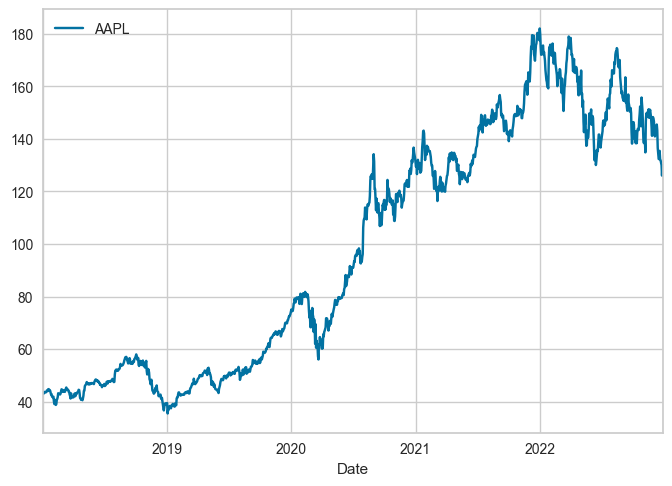

In [83]:
df.plot()
plt.show()

In [84]:
df.index

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
             '2018-01-12', '2018-01-16',
             ...
             '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
             '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
             '2022-12-29', '2022-12-30'],
            dtype='period[B]', name='Date', length=1259)

In [85]:
idx = pd.period_range(min(df.index), max(df.index))
idx

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
             '2018-01-12', '2018-01-15',
             ...
             '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
             '2022-12-23', '2022-12-26', '2022-12-27', '2022-12-28',
             '2022-12-29', '2022-12-30'],
            dtype='period[B]', length=1304)

In [86]:
# we are missing holidays!!!
df.index.symmetric_difference(pd.period_range(min(df.index), max(df.index), freq='B'))

PeriodIndex(['2018-01-15', '2018-02-19', '2018-03-30', '2018-05-28',
             '2018-07-04', '2018-09-03', '2018-11-22', '2018-12-05',
             '2018-12-25', '2019-01-01', '2019-01-21', '2019-02-18',
             '2019-04-19', '2019-05-27', '2019-07-04', '2019-09-02',
             '2019-11-28', '2019-12-25', '2020-01-01', '2020-01-20',
             '2020-02-17', '2020-04-10', '2020-05-25', '2020-07-03',
             '2020-09-07', '2020-11-26', '2020-12-25', '2021-01-01',
             '2021-01-18', '2021-02-15', '2021-04-02', '2021-05-31',
             '2021-07-05', '2021-09-06', '2021-11-25', '2021-12-24',
             '2022-01-17', '2022-02-21', '2022-04-15', '2022-05-30',
             '2022-06-20', '2022-07-04', '2022-09-05', '2022-11-24',
             '2022-12-26'],
            dtype='period[B]')

In [87]:
df = df.reindex(idx, fill_value=np.nan)

In [88]:
df.tail()

,AAPL
2022-12-26,NaN
2022-12-27,130.029999
2022-12-28,126.040001
2022-12-29,129.610001
2022-12-30,129.929993


In [92]:
df = df.fillna(method = 'ffill')

In [94]:
df.tail(10) 
# pay attention to Dec 26!

,AAPL
2022-12-19,132.369995
2022-12-20,132.300003
2022-12-21,135.449997
2022-12-22,132.229996
2022-12-23,131.860001
2022-12-26,131.860001
2022-12-27,130.029999
2022-12-28,126.040001
2022-12-29,129.610001
2022-12-30,129.929993


Setting up PyCaret Experiment:

In [53]:
from pycaret.time_series import *

In [115]:
exp = TSForecastingExperiment()
exp.setup(data = df, target='AAPL', fh=60  ,coverage=0.90, fold_strategy='sliding', fold=5)

,Description,Value
0,session_id,2226
1,Target,AAPL
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1304, 1)"
5,Transformed data shape,"(1304, 1)"
6,Transformed train set shape,"(1244, 1)"
7,Transformed test set shape,"(60, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,SlidingWindowSplitter


In [118]:
exp.plot_model(plot='train_test_split')

In [103]:
exp.plot_model(plot = 'decomp')


Let's see which one is the best model so far? 

In [104]:
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
croston,Croston,sktime.forecasting.croston.Croston,True
ets,ETS,sktime.forecasting.ets.AutoETS,True


In [119]:
exp.compare_models(include=['naive','exp_smooth', 'ets'], cross_validation=False)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ets,ETS,2.0412,1.7727,6.2446,7.7587,0.0445,0.0439,-0.2330,0.2100
exp_smooth,Exponential Smoothing,2.0415,1.7734,6.2455,7.7617,0.0445,0.0439,-0.2339,0.2800
naive,Naive Forecaster,2.1039,1.7094,6.4363,7.4817,0.0449,0.0454,-0.1465,0.0800


AutoETS(seasonal='mul', sp=5, trend='add')

In [120]:
exp.compare_models(include=['naive','exp_smooth', 'ets'], cross_validation=True)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,3.6191,2.9679,10.2462,11.9600,0.0654,0.0653,-1.5274,0.9060
ets,ETS,3.8666,3.1735,10.9693,12.8114,0.0713,0.0694,-2.2047,0.6040
exp_smooth,Exponential Smoothing,3.8807,3.1837,11.0157,12.8589,0.0716,0.0697,-2.2266,0.6500


NaiveForecaster()

In [121]:
ets = exp.create_model('ets', cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.0412,1.7727,6.2446,7.7587,0.0445,0.0439,-0.2330


In [122]:
exp.plot_model(estimator=ets, plot="diagnostics")

How to read the periodogram: 
the periodogram is a visual representation of the frequency spectrum of a time series dataset. It is used to identify the presence of any repeating patterns or seasonal trends in the data. A periodogram of white noise will generally have a flat, uniform appearance, with no clear peaks or patterns.

In [125]:
exp.plot_model(ets, plot='forecast', data_kwargs={'fh':100})

---
## Predict Model

This function predicts Label using a trained model. When data is None, it predicts label on the holdout set.



In [126]:
holdout_pred = exp.predict_model(ets)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ETS,2.0412,1.7727,6.2446,7.7587,0.0445,0.0439,-0.2330


# Done!